# Projekt ML, przygotowanie features.

Uczenie maszynowe zrealizowano w pliku "Projekt ML"

Poniższy rozdział pokazuje przykładowe określenie dadatkowych cech na podstawie danych.

Do analizy przyjęto dane wygenerowane w pliku "Projekt ML, przygotowanie danych"

Jako dodatkowe wskaźniki (features) przyjęto:

* moc / tonę
* cylinders / displacement
* moc / displacement
* moc/rok_produkcji

Cechy te wynikają z wiedzy ogólnej. Są to elementy, które mogą wpływać na ekonomikę zużycia paliwa.

Jako dane podstawowe przyjęto zbiór z kolumną 'origin' traktowaną jako dane kategoryczne (dummies): 'cars_4_ML_dummy_origin_cleared.csv'. Dane w tym pliku nie zawierają wartości odstających.



In [5]:
# import potrzebnych bibliotek
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
# wczytanie danych z pliku
df = pd.read_csv('cars_4_ML_dummy_origin_cleared.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           366 non-null    float64
 1   cylinders     366 non-null    int64  
 2   displacement  366 non-null    float64
 3   horsepower    366 non-null    int64  
 4   weight        366 non-null    int64  
 5   acceleration  366 non-null    float64
 6   year          366 non-null    int64  
 7   name          366 non-null    object 
 8   origin_1      366 non-null    bool   
 9   origin_2      366 non-null    bool   
 10  origin_3      366 non-null    bool   
dtypes: bool(3), float64(3), int64(4), object(1)
memory usage: 24.1+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mpg                         366 non-null    float64
 1   cylinders                   366 non-null    int64  
 2   displacement                366 non-null    float64
 3   horsepower                  366 non-null    int64  
 4   weight                      366 non-null    int64  
 5   acceleration                366 non-null    float64
 6   year                        366 non-null    int64  
 7   name                        366 non-null    object 
 8   origin_1                    366 non-null    bool   
 9   origin_2                    366 non-null    bool   
 10  origin_3                    366 non-null    bool   
 11  horsepower_vs_weight        366 non-null    float64
 12  cylinders_vs_displacement   366 non-null    float64
 13  horsepower_vs_displacement  366 non

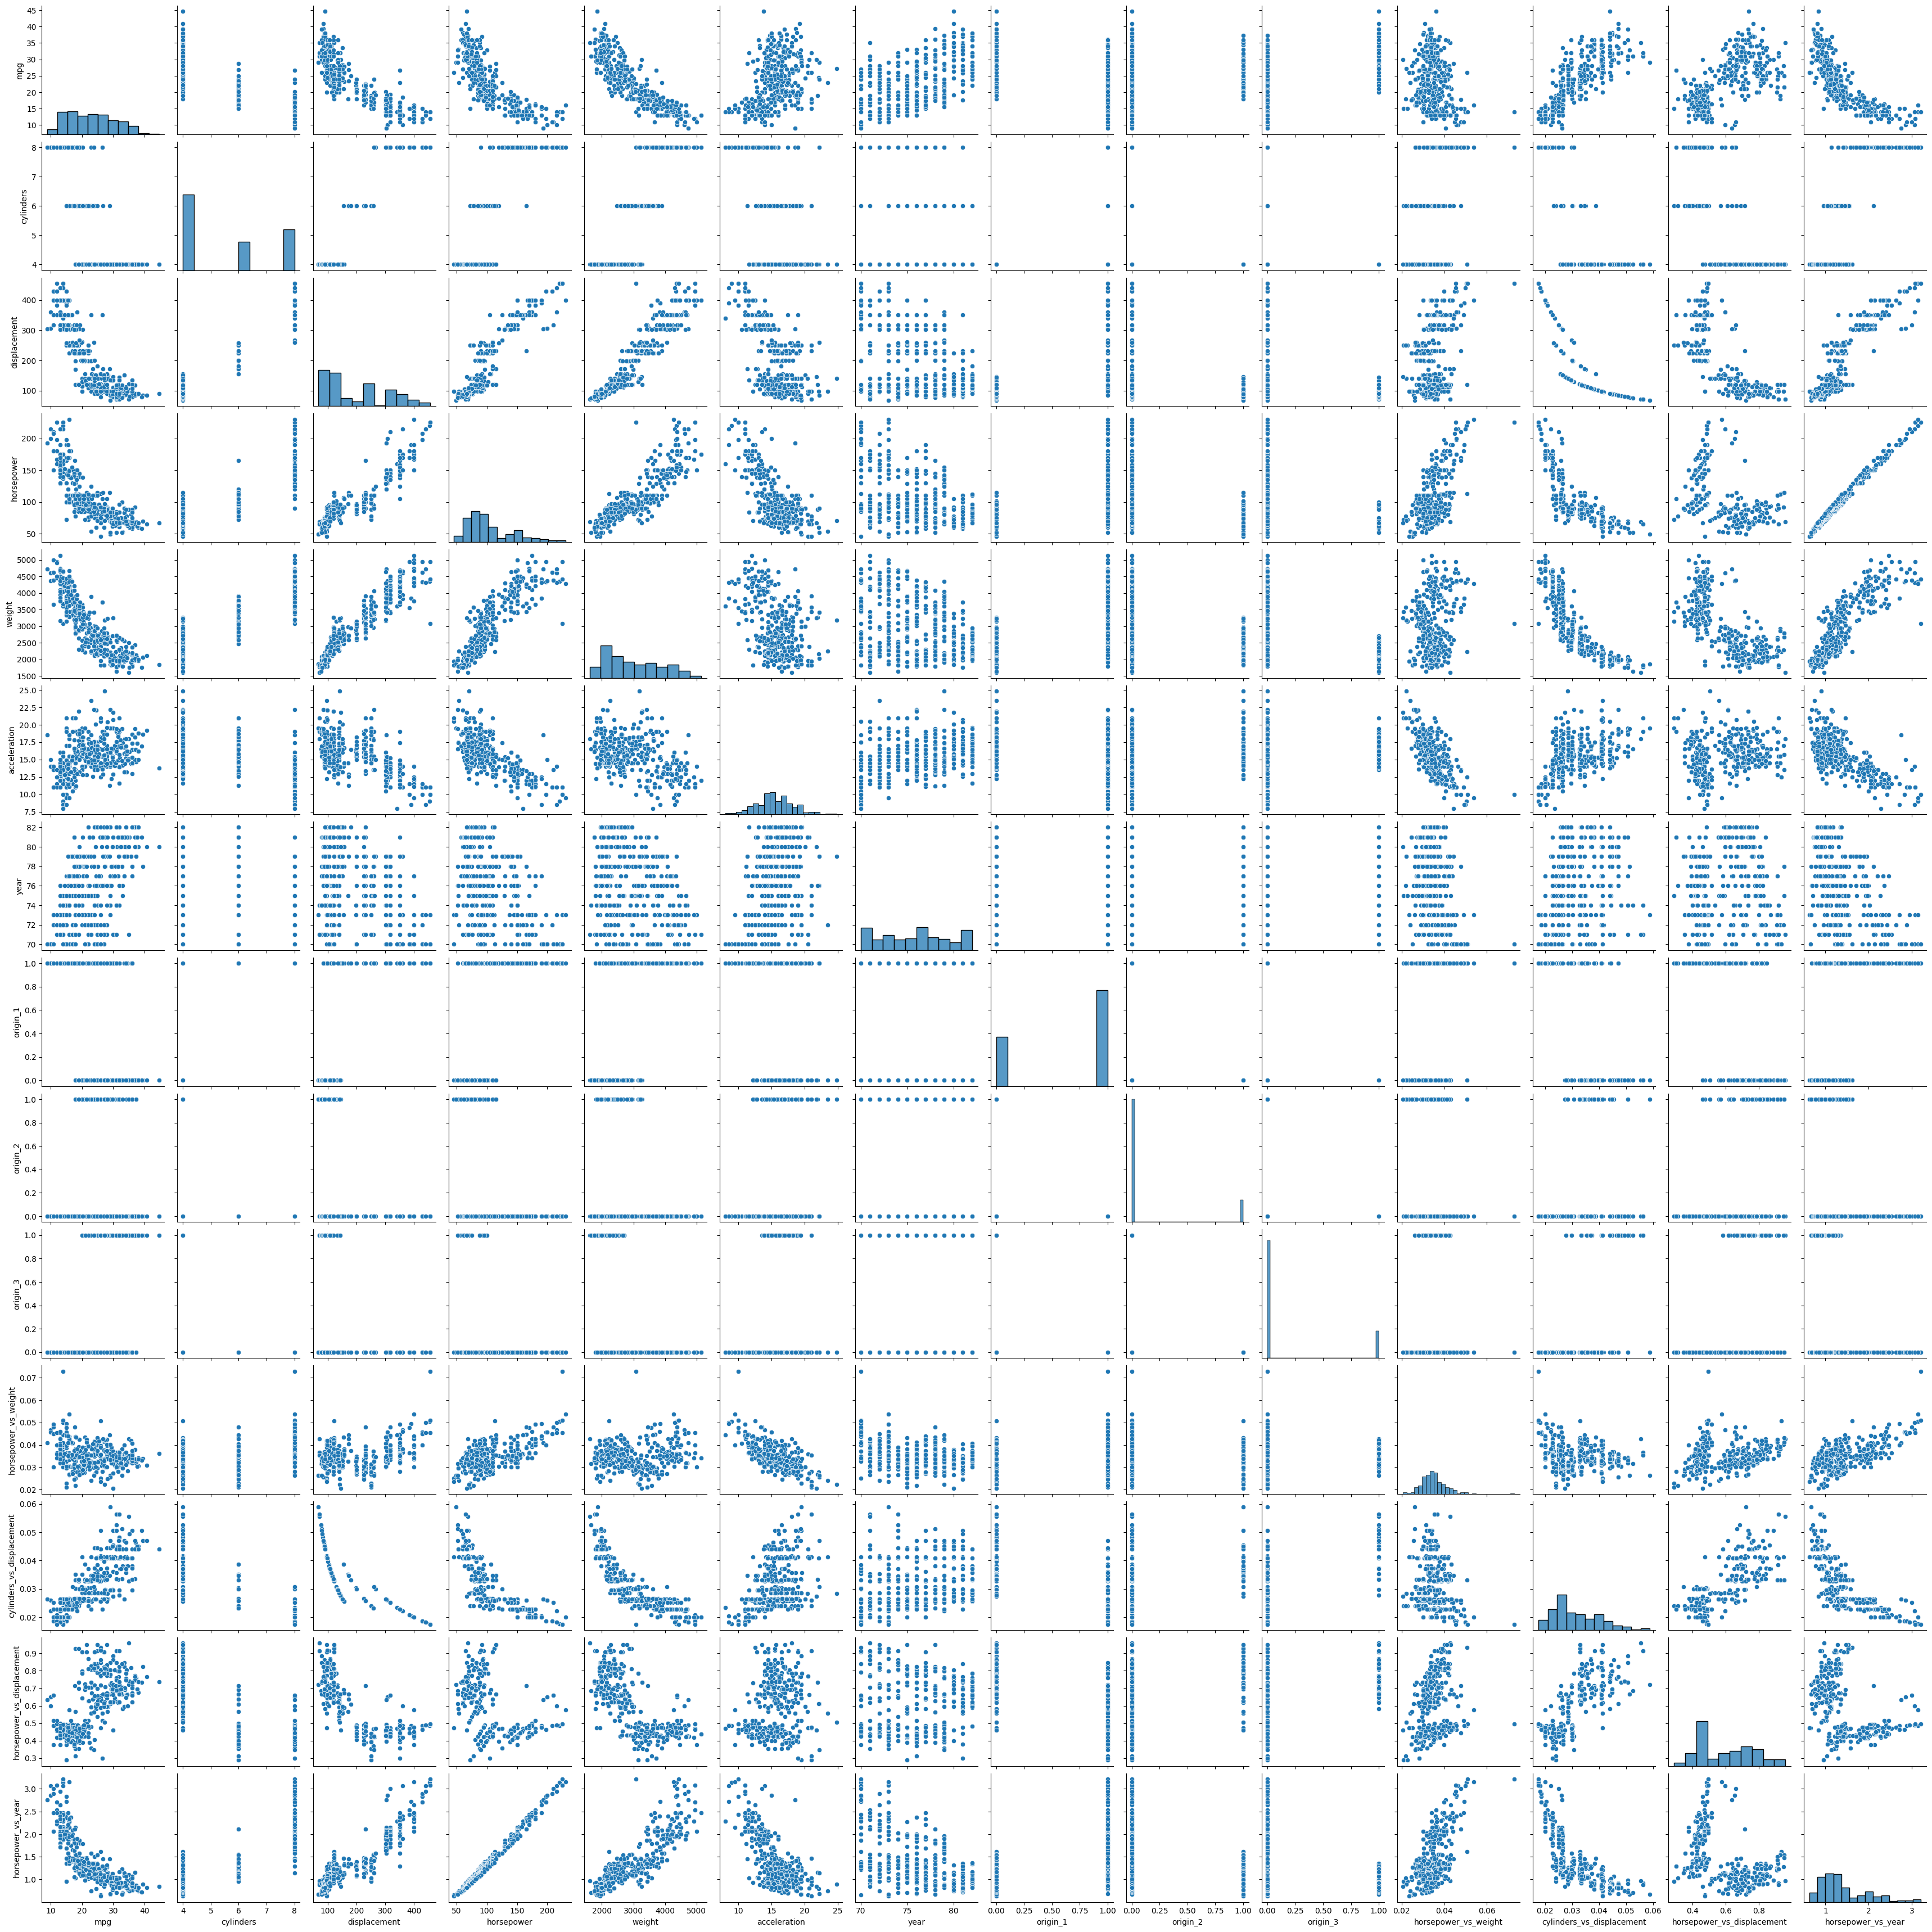

In [7]:
# obliczenie dodatkowych features
    # moc / tonę
df['horsepower_vs_weight'] = df['horsepower'] / df['weight']
# cylinders / displacement
df['cylinders_vs_displacement'] = df['cylinders'] / df['displacement']
# moc / displacement
df['horsepower_vs_displacement'] = df['horsepower'] / df['displacement']
# moc/rok_produkcji
df['horsepower_vs_year'] = df['horsepower'] / df['year']

print(df.info())
print(df.head())
print(df.describe())
sns.pairplot(df)

Wstępna ocena przydatności nowych cech (features) jest dokonywana na podstawie wykresu pairplot (pierwszy wiersz dotyczący mpg). Dla nowych cech można zauważyć wyraźne trendy w danych, co prawdopodobnie będzie poprawiać wyniki obliczeń ML. Chcemy pokazać porównanie wyników ML dla zbioru bez dodatkowych cech, na tym etapie nie przekształcamy cech przez logarytmowanie, itp.

In [8]:
# zapisanie danych do pliku
df.to_csv('cars_4_ML_dummy_origin_cleared_features.csv', index=False)